# Maximum Likelihood Estimation and Maximum A Posteriori Estimation


This tutorial is motivated by awesome lecture of [Kilian Weinberger](https://www.cs.cornell.edu/~kilian/) ([Machine Learning Lecture 11 "Logistic Regression" -Cornell CS4780 SP17](https://www.youtube.com/playlist?list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS)).


In this tutorial, we go through all details about using MLE and MAP for estimating parameters of Logistic Regression

# Logistic Regression
## Setup

$\mathcal D = \{(x_i,y_i) \}_{i=1} ^n s.t. \mathcal D \sim \mathbb P(\mathcal X , \mathcal Y)$ where $\mathcal X \in \mathbb R^d$ and
$\mathcal Y \in {1,0}$
$$ \mathbb p (y =1 |x;w) = \frac{1}{1 + exp\Big(-w^T x\Big)}=\frac{exp\Big(w^T x)}{1 + exp\Big(w^T x) \Big)}$$


$$ \mathbb p (y =0 |x;w) = 1 - \frac{1}{1 + exp\Big(- w^T x) \Big)}=\frac{exp\Big(- w^T x)}{1 + exp\Big(- w^T x) \Big)}$$


In [1]:
import numpy as np
z=10
assert np.isclose((1 / (1+ np.exp(-z))), (np.exp(z) / (1+ np.exp(z))))
assert np.isclose(1-(1 / (1+ np.exp(-z))), (np.exp(-z) / (1+ np.exp(-z))))

We can estimate paramters of logistic regression $(w,b)$ via Maximum Likelihood Estimation (MLE) and 
Maximum a Posteriori Estimation (MAP)

## Estimate $(w,b)$ via MLE

**Setup** Maximize the conditional likelihood of $\mathcal D$.


### 1. $ argmax_{w} \mathbb P (\mathcal D ;w)$
__Find $w$ that maximize the likelihood of seeing the data__

### 2. $ argmax_{w} \prod_{i=1} ^n \mathbb P (x_i,y_i ;w)$
__Data $\mathcal D $ is sampled i.i.d.__

### 3. $ argmax_{w} \prod_{i=1} ^n \mathbb P (y_i | x_i; w) \mathbb P (x_i; w) $
__Apply the conditional probability__

### 4. $ argmax_{w} \prod_{i=1} ^n \mathbb P (y_i | x_i; w)$
__Probability of an input $\mathbb P (x_i)$ is constant__

### 5. $ argmax_{w} log\Big(\prod_{i=1} ^n \mathbb P (y_i | x_i; w) \Big)$
__Instead of computing product of probabilities, compute sum of log probabilities__

### 6. $ argmax_{w} \sum_{i=1} ^n log(\mathbb P (y_i | x_i; w))  $
__Distribute the log__

### 7. $ argmin_{w} -\sum_{i=1} ^n log(\mathbb P (y_i | x_i; w))  $
__Minimize negative log likelihood. This is the objective__

### 8. $argmin_{w} -\sum_{i=1} ^n \log \big( \mathbb P (y_i=1 | x_i; w \big)^{y_i} +  \big(\mathbb P (y_i=0 | x_i; w) \big)^{(1-y_i)} $
__Given input, labels has binomial distribution__

### 9. $argmin_{w} -\sum_{i=1} ^n y_i \log \Big(\mathbb P (y_i=1 | x_i; w)\Big) + (1-y_i) \log\Big(\mathbb P (y_i=0 | x_i; w)\Big)$

__Log of power: $ln(x^y)=yln(x)$__

### 11. $ argmin_{w} -\sum_{i=1} ^n y_i \log \Big(\mathbb P (y_i=1 | x_i; w)\Big) + \log\Big(\mathbb P (y_i=0 | x_i; w)\Big) - y_i \log\Big(\mathbb P (y_i=0 | x_i; w)\Big)$

__Distribite $(1-y_i) * x = x - xy_i$__


### 12. $argmin_{w} -\sum_{i=1} ^n y_i \log \Big( \frac{\mathbb P (y_i=1 | x_i; w)}{\mathbb P (y_i=0 | x_i, w)}\Big) + \log\Big(\mathbb P (y_i=0 | x_i; w)\Big)$

__Apply quotient rule of log__

#### 13. $argmin_{w} -\sum_{i=1} ^n y_i \Big[\log \Big( \frac{\frac{exp(w^T x)}{1 + exp(w^T x)}}{\frac{1}{1 + exp(w^T x)}} \Big) \Big] + \log \Big(\frac{1}{1 + exp(w^T x)}\Big)$




#### 14. $argmin_{w} -\sum_{i=1} ^n y_i \Big[\log \Big(exp(w^T x)\Big) \Big] -\log \Big(1 + exp(w^T x)\Big)$

## 15.  $argmin_{w} -\sum_{i=1} ^n y_iw^T x -\log\Big(1 + exp(w^T x)\Big)$

Our loss function

## 16.  $argmin_{w} -\Big( YXw -\log (1 + exp(Xw) \Big)$

Our loss function in __matrix notation__

# Estimating Parameters via Gradient descent

### $\mathcal L(w)= -\Big( YXw -\log (1 + exp(Xw) \Big)$


### 1. $$ \frac{\partial \mathcal L(w)}{ \partial w_\alpha}= YX - \Big( \frac{0+Xexp(Xw_\alpha)}{1+exp(Xw_\alpha)}\Big)$$

1. $\log(u(x))'= \frac{u(x)'}{u(x)}$
2. $(e^{u(x)})' = e^{u(x)} * u(x)'$

### 2. $$ \frac{\partial \mathcal L(w)}{ \partial w_\alpha}= X\Big(Y- \frac{exp(Xw_\alpha)}{1+exp(Xw_\alpha)}\Big)$$
Group terms


### 3. $$ \frac{\partial \mathcal L(w)}{ \partial w_\alpha}= X\Big(Y- \frac{1}{1+exp(-Xw_\alpha)}\Big)$$
Simplfy


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

[(-8.0, 8.0), (-15.0, 5.0)]

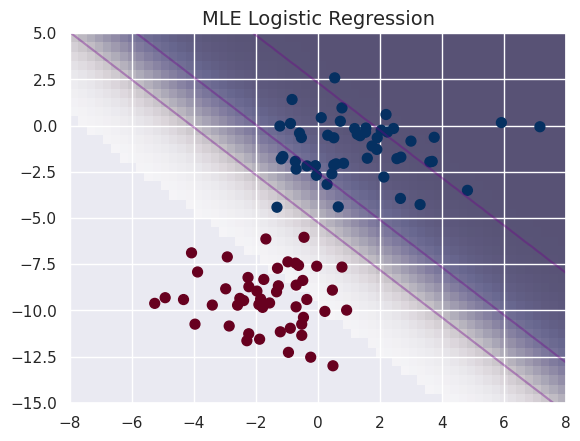

In [3]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('MLE Logistic Regression', size=14)

X_stack=np.hstack((X,np.ones((len(X),1))))
w=np.random.randn(X_stack.shape[1])

for i in range(500):

    # Negative Log Likelihood Loss
    loss=-np.sum(y*(X_stack@w) - np.log(1+np.exp(X_stack@w)))
    # Derivative of loss w.r.t. w
    dw= -(X_stack.T@(y - 1 / (1+np.exp(-X_stack@w))))
    w-=.001 *dw
    
# Visualization worka perfectly
xlim,ylim = (-8, 8), (-15, 5)
xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Xgrid=np.hstack((Xgrid,np.ones((len(Xgrid),1))))

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    P=1 / (1+np.exp(-Xgrid@w))
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),levels=[0.4, .8 ,0.99],colors=color, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim)

In [4]:
w@w

10.596146382254547

## Estimate $(w,b)$ via MAP


**Setup** Consider $w$ as a random variable: $ \mathbb P(w | \mathcal D) = \mathbb P(w | X,y) \propto \mathbb P(y | X,w) \mathbb P(w)$


### 1 $ w = argmax_{w} \mathbb P ( w | \mathcal D) $

### 2. $ argmax_{w} \frac{\mathbb P (\mathcal D | w) \mathbb P(w)}{\mathbb P(\mathcal D)}$
Apply Bayes Rule

### 3. $ argmax_{w} \mathbb P (\mathcal D | w) \mathbb P(w)$
$\mathbb P(\mathcal D)$ is a constant


### 4. $ argmax_{w} \Big[\prod_{i=1} ^n P (x_i,y_i | w) \Big] \mathbb P(w)$
$\mathbb P(\mathcal D)$ is a constant


### 5. $ argmax_{w} \Big[\prod_{i=1} ^n \mathbb P (y_i | x_i, w) \mathbb P (x_i| w) \Big] \mathbb P(w)$

Apply Chain Rule

### 6. $ argmax_{w} \Big[\prod_{i=1} ^n \mathbb P (y_i | x_i, w) \mathbb P (x_i) \Big] \mathbb P(w)$

$\mathbb P (x_i)$ does not depend on $w$.


### 7. $ argmax_{w} \Big[\prod_{i=1} ^n \mathbb P (y_i | x_i, w) \Big] \mathbb P(w)$

$\mathbb P (x_i)$ is constant


### 8. $ argmax_{w} log\Big(\Big[\prod_{i=1} ^n \mathbb P (y_i | x_i, w) \Big] \mathbb P(w) \Big)$
Take the log

### 9. $ argmax_{w} \Big[\sum_{i=1} ^n log(\mathbb P (y_i | x_i, w)) \Big] + log(\mathbb P(w)) $
Distribute the log. The first part is exactly same as in MLE. Let's focus on the second term


## 10.  $log(\mathbb P(w))=log\Big(\frac{1}{\sqrt{2\pi \tau^2}} exp(-\frac{w^T w}{2\tau^2})\Big)$




## 11.  $argmin_{w} -\sum_{i=1} ^n y_iw^T x -\log\Big(1 + exp(w^T x)\Big) + \lambda w^Tw$


[(-8.0, 8.0), (-15.0, 5.0)]

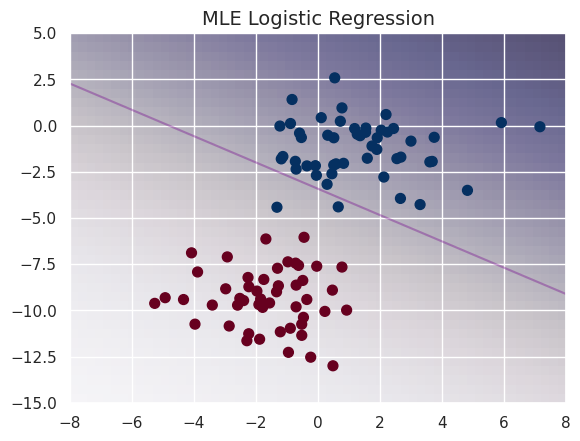

In [5]:
#X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('MLE Logistic Regression', size=14)

w=np.random.randn(X_stack.shape[1])

for i in range(500):
    # Negative Log Likelihood Loss
    loss=-np.sum(y*(X_stack@w) - np.log(1+np.exp(X_stack@w))) + w@w
    # Derivative of loss w.r.t. w
    dw= -( X_stack.T@(y - 1 / (1+np.exp(-X_stack@w))))
    w-= .001 *dw +.5*w 
    
# Visualization worka perfectly
xlim,ylim = (-8, 8), (-15, 5)
xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Xgrid=np.hstack((Xgrid,np.ones((len(Xgrid),1))))

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    P=1 / (1+np.exp(-Xgrid@w))
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),levels=[0.4, .8 ,0.99],colors=color, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim)

In [6]:
w@w

0.025113249868648824